# TASK 36

#### Import Library

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


#### Load the MNIST dataset

In [2]:

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


train_images = train_images / 255.0
test_images = test_images / 255.0


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 9s 1us/step


#### Build CNN Model 

In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for MNIST
])


c:\Users\kkrab\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Compile The Model 

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#### Train the model

In [5]:
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 35ms/step - accuracy: 0.9045 - loss: 0.3082 - val_accuracy: 0.9862 - val_loss: 0.0426
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 69s 37ms/step - accuracy: 0.9854 - loss: 0.0476 - val_accuracy: 0.9866 - val_loss: 0.0401
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9897 - loss: 0.0319 - val_accuracy: 0.9865 - val_loss: 0.0366
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 30ms/step - accuracy: 0.9927 - loss: 0.0231 - val_accuracy: 0.9891 - val_loss: 0.0312
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 58s 31ms/step - accuracy: 0.9947 - loss: 0.0171 - val_accuracy: 0.9901 - val_loss: 0.0310


#### Evaluate the Model

In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9874 - loss: 0.0389
Test accuracy: 0.9901000261306763


#### Visualize the Training Process

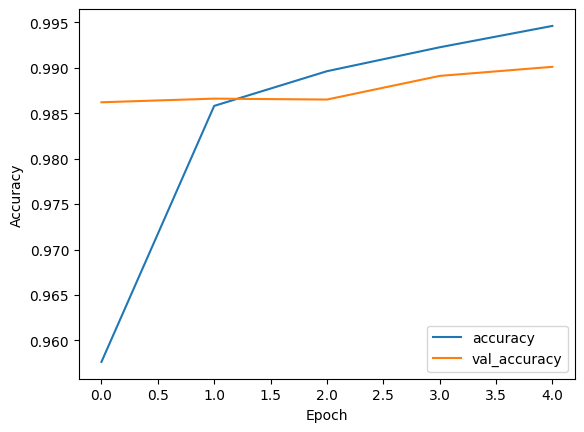

In [7]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()
